Epoch 1/50


C:\Users\Dexter\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5723 - loss: 0.6729 - val_accuracy: 0.7256 - val_loss: 0.5894
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7957 - loss: 0.5083 - val_accuracy: 0.7561 - val_loss: 0.4955
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8457 - loss: 0.3870 - val_accuracy: 0.7988 - val_loss: 0.4400
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8839 - loss: 0.3230 - val_accuracy: 0.8232 - val_loss: 0.4119
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9122 - loss: 0.2610 - val_accuracy: 0.8415 - val_loss: 0.4000
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9257 - loss: 0.2353 - val_accuracy: 0.8476 - val_loss: 0.3870
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9263 - loss: 0.2384 - val_accuracy: 0.8476 - val_loss: 0.3735
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9041 - loss: 0.2389 - val_accuracy: 0.8476 - val_loss: 0.3600
Ep

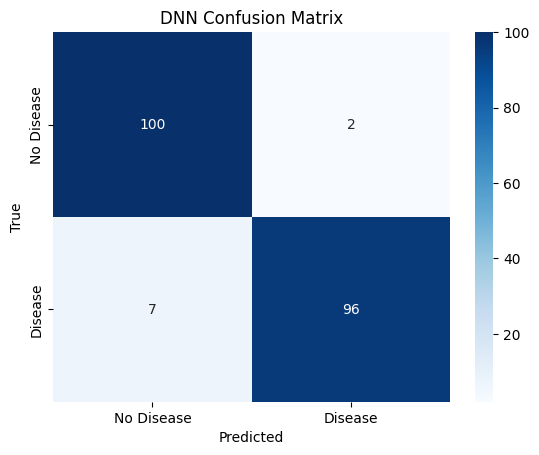

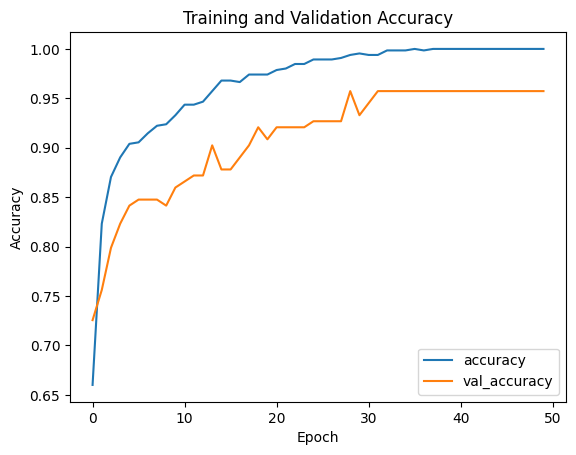

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
df = pd.read_csv("heart.csv")

# Data Preprocessing
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Convert categorical columns to numerical values
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Feature selection
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Convert probabilities to percentage
y_pred_proba_percent = y_pred_proba * 100

# Show first few probabilities as percentages
for i in range(10):
    print(f"Sample {i+1}: {y_pred_proba_percent[i][0]:.2f}% chance of having heart disease")

# DNN Evaluation
dnn_accuracy = accuracy_score(y_test, y_pred)
print(f"\nDNN Accuracy: {dnn_accuracy:.4f}")
print("\nDNN Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("DNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Epoch 1/200


C:\Users\Dexter\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5729 - loss: 1.7093 - val_accuracy: 0.7500 - val_loss: 1.4299
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8188 - loss: 1.3171 - val_accuracy: 0.7805 - val_loss: 1.2206
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8678 - loss: 1.0931 - val_accuracy: 0.7988 - val_loss: 1.0779
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8640 - loss: 0.9699 - val_accuracy: 0.7988 - val_loss: 0.9703
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8914 - loss: 0.8384 - val_accuracy: 0.8049 - val_loss: 0.8786
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8801 - loss: 0.7464 - val_accuracy: 0.8110 - val_loss: 0.8057
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9170 - loss: 0.6497 - val_accuracy: 0.8110 - val_loss: 0.7446
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8831 - loss: 0.6196 - val_accuracy: 0.8293 - val_loss: 0.

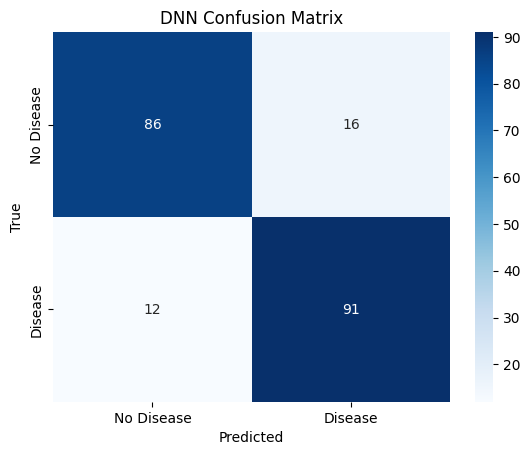

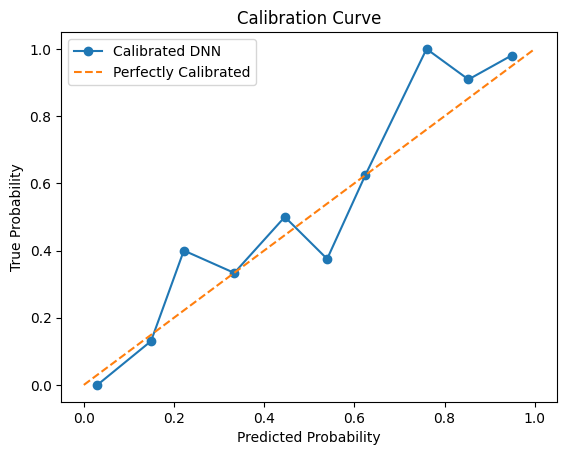

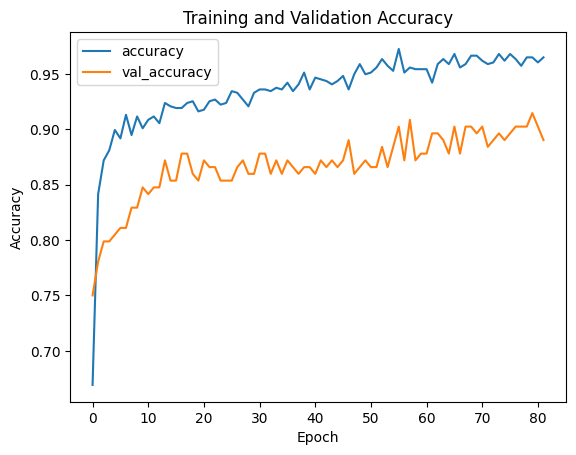

In [3]:
#V5.2
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.calibration import calibration_curve  # Correct import
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("heart.csv")

# Data Preprocessing
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Convert categorical columns to numerical values
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Feature selection
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Build the DNN model with regularization and dropout
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping and class weights
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    class_weight=class_weights_dict,
    verbose=1
)

# Evaluate the model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Apply temperature scaling to calibrate probabilities
temperature = 1.5  # Adjust this value (e.g., 0.5, 1.0, 2.0)
scaled_probs = tf.nn.sigmoid(np.log(y_pred_proba / (1 - y_pred_proba)) / temperature).numpy()

# Convert scaled probabilities to percentage
scaled_probs_percent = scaled_probs * 100

# Show first few probabilities as percentages
print("Calibrated Probabilities:")
for i in range(10):
    print(f"Sample {i+1}: {scaled_probs_percent[i][0]:.2f}% chance of having heart disease")

# DNN Evaluation
dnn_accuracy = accuracy_score(y_test, y_pred)
print(f"\nDNN Accuracy: {dnn_accuracy:.4f}")
print("\nDNN Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("DNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot calibration curve
prob_true, prob_pred = calibration_curve(y_test, scaled_probs, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated DNN')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()